In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
data = pd.read_csv("merged_data.csv")
# Any results you write to the current directory are saved as output.
data.head(10)
np.random.seed(seed=42)

In [112]:
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

36                 99.995925
61                 99.323553
4                  98.182559
58                 96.083945
59                 96.083945
60                 96.083945
57                 95.599022
8                  84.971475
5                  20.105949
17                  4.400978
10                  4.400978
7                   3.916055
2                   3.916055
45                  3.916055
44                  2.766911
56                  0.994295
20                  0.000000
21                  0.000000
3                   0.000000
33                  0.000000
Cost unit           0.000000
48                  0.000000
43                  0.000000
46                  0.000000
47                  0.000000
Cost                0.000000
49                  0.000000
50                  0.000000
Cost m2             0.000000
Cost m2 unit        0.000000
CadastralNumber     0.000000
dtype: float64

In [113]:
for feature in ["20", "21", "48", "49"]:
    print(f"Unique values of {feature}")
    print(data[feature].unique())
    print("-----------------------------------")

Unique values of 20
[  0.  81.  95. 189. 107. 146.  21.  61.  17.  46. 139.  92.  84.  38.
 127.  80. 195.  28.  97. 117. 202.  23. 130.  85.]
-----------------------------------
Unique values of 21
[ 0.  11.  32.  14.  13.   9.2  7.  19.   3.5 27.   8.1 12.  22.   4.7
 21.  23.   4.1 20. ]
-----------------------------------
Unique values of 48
[117 118]
-----------------------------------
Unique values of 49
[124 123 122 121]
-----------------------------------


In [114]:
to_drop = ["Cost m2 unit", "Cost unit", "43", "44", "CadastralNumber"]
print("Before -",data.shape)
for column in data.columns:
    if data[column].isnull().sum() > data.shape[0] * 0.4 or len(data[column].unique()) == 1:
        to_drop.append(column)
data = data.drop(to_drop, axis=1).dropna()
print("After -",data.shape)

Before - (24540, 31)
After - (19594, 15)


In [115]:
print("20", data["20"].unique())
print("21", data["21"].unique())
print("48", data["48"].unique())
print("49", data["49"].unique())

20 [0.]
21 [0.]
48 [117]
49 [124]


In [116]:
data = data.drop(["20", "21", "48", "49"], axis=1)

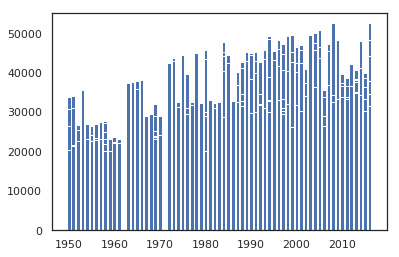

In [117]:
plt.bar(data["33"], data["Cost m2"])
plt.show()

In [118]:
data.head(4)

,10,17,2,3,33,45,5,56,7,Cost m2,Cost
0,3137.450,57.331,1.0,3,1982,102.0,30.0,11160.0,38.0,32280.39,1068480.91
1,1277.343,102.840,2.0,5,1973,104.0,31.0,14624.0,38.0,42853.69,1277039.96
2,1315.543,120.413,2.0,5,2005,102.0,31.0,11155.0,41.0,43745.45,5179461.28
3,3054.712,108.931,2.0,5,1998,102.0,33.0,10933.0,41.0,30787.71,3294284.97


In [119]:
import math
def transformation(value, transform='square'): 
    if transform == 'log':
        return 0 if math.log1p(value) == None else max(0, min(10 ** 3, math.log1p(value))) 
    elif transform == 'sqrt':
        return math.sqrt(value + 3.0 / 8) 
    elif transform == 'square':
        return value ** 2 
    elif transform == 'sin':
        return math.sin(value)
    elif transform == 'cos': 
        return math.cos(value)
data["sum1"] = data["17"] + data["7"]
data["mul1"] = data["3"] * data["2"]
data["mul2"] = data["7"] * data["5"]
columns = data.drop(["Cost m2", "Cost"], axis=1).columns
possible_transformations = ["log", "sqrt", "square", "sin", "cos"]
for column in columns:
    for transform in possible_transformations:
        data[f"{column}_{transform}"] = data[column].apply(transformation,  args=(transform,))
print(data.columns)

Index(['10', '17', '2', '3', '33', '45', '5', '56', '7', 'Cost m2', 'Cost',
       'sum1', 'mul1', 'mul2', '10_log', '10_sqrt', '10_square', '10_sin',
       '10_cos', '17_log', '17_sqrt', '17_square', '17_sin', '17_cos', '2_log',
       '2_sqrt', '2_square', '2_sin', '2_cos', '3_log', '3_sqrt', '3_square',
       '3_sin', '3_cos', '33_log', '33_sqrt', '33_square', '33_sin', '33_cos',
       '45_log', '45_sqrt', '45_square', '45_sin', '45_cos', '5_log', '5_sqrt',
       '5_square', '5_sin', '5_cos', '56_log', '56_sqrt', '56_square',
       '56_sin', '56_cos', '7_log', '7_sqrt', '7_square', '7_sin', '7_cos',
       'sum1_log', 'sum1_sqrt', 'sum1_square', 'sum1_sin', 'sum1_cos',
       'mul1_log', 'mul1_sqrt', 'mul1_square', 'mul1_sin', 'mul1_cos',
       'mul2_log', 'mul2_sqrt', 'mul2_square', 'mul2_sin', 'mul2_cos'],
      dtype='object')


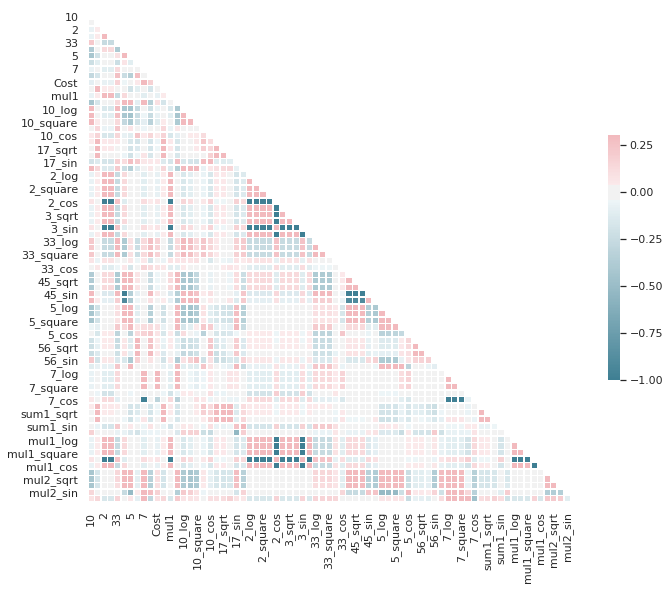

In [120]:
import seaborn as sns
from string import ascii_letters
sns.set(style="white")

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [121]:
def remove_collinear_features(x, threshold):
    y = x['Cost m2']
    x = x.drop(['Cost m2'], axis=1)
    # Считаем матрицу кореляций
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Сравниваем фичу каждую с каждой
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # Если кореляция больше, чем трешхолд
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Удаляем по одному из каждой пары корелируемых
    drops = set(drop_cols)
    x = x.drop(drops, axis=1)
    
    # Возвращаем таргет в таблицу
    x['Cost m2'] = y
    return x

data = remove_collinear_features(data, 0.6)

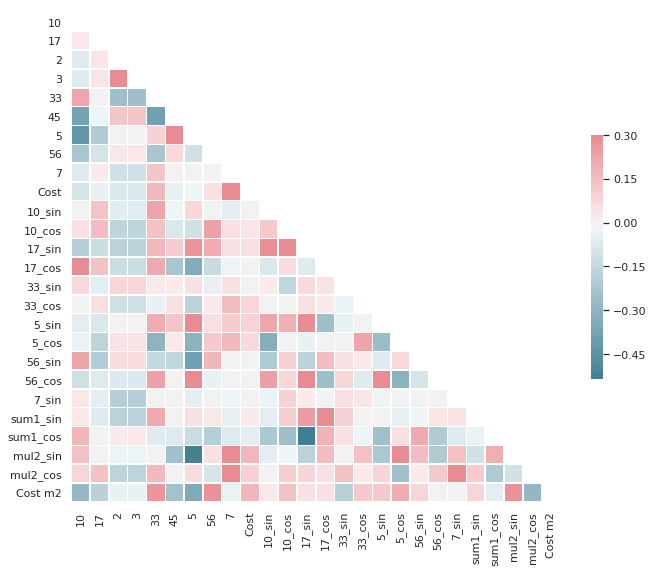

In [122]:
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [123]:
from sklearn.model_selection import train_test_split

Y = data["Cost m2"]
X = data.drop(["Cost m2", "Cost"], axis=1)
X_train, X_test_val, Y_train, Y_test_val = train_test_split(X, Y, test_size=0.1, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test_val, Y_test_val, test_size=0.5, random_state=42)

In [124]:
import catboost as cb

cb_model = cb.CatBoostRegressor(
#     task_type="GPU"
)
cb_model.fit(
    X_train, Y_train,
    use_best_model=True,
    eval_set=cb.Pool(X_val, Y_val),
    logging_level="Verbose",  # 'Silent', 'Verbose', 'Info', 'Debug'
    early_stopping_rounds=1,
    plot=True
)
print(cb_model.score(X_test, Y_test))
cb_model.save_model("trained_model", format="cbm")


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 33600.0181077	test: 33770.5428653	best: 33770.5428653 (0)	total: 14.2ms	remaining: 14.1s
1:	learn: 32607.5252040	test: 32775.6961023	best: 32775.6961023 (1)	total: 24.5ms	remaining: 12.2s
2:	learn: 31642.2986470	test: 31809.4323019	best: 31809.4323019 (2)	total: 37.4ms	remaining: 12.4s
3:	learn: 30708.0349050	test: 30875.4866065	best: 30875.4866065 (3)	total: 46.8ms	remaining: 11.7s
4:	learn: 29803.7638432	test: 29968.5869691	best: 29968.5869691 (4)	total: 56.4ms	remaining: 11.2s
5:	learn: 28919.8089912	test: 29080.2778723	best: 29080.2778723 (5)	total: 66.2ms	remaining: 11s
6:	learn: 28069.3421571	test: 28229.6705478	best: 28229.6705478 (6)	total: 76.3ms	remaining: 10.8s
7:	learn: 27248.6363873	test: 27408.2518150	best: 27408.2518150 (7)	total: 86.3ms	remaining: 10.7s
8:	learn: 26457.3088567	test: 26621.7452954	best: 26621.7452954 (8)	total: 96.5ms	remaining: 10.6s
9:	learn: 25678.7543768	test: 25838.7943549	best: 25838.7943549 (9)	total: 106ms	remaining: 10.5s
10:	learn: 24

96:	learn: 2253.3125976	test: 2277.0265548	best: 2277.0265548 (96)	total: 1.02s	remaining: 9.47s
97:	learn: 2198.7258503	test: 2221.4261995	best: 2221.4261995 (97)	total: 1.03s	remaining: 9.47s
98:	learn: 2146.1562278	test: 2167.3257149	best: 2167.3257149 (98)	total: 1.04s	remaining: 9.45s
99:	learn: 2094.0512519	test: 2113.8365461	best: 2113.8365461 (99)	total: 1.05s	remaining: 9.44s
100:	learn: 2042.8889200	test: 2063.9827747	best: 2063.9827747 (100)	total: 1.06s	remaining: 9.43s
101:	learn: 1993.7099387	test: 2014.7066063	best: 2014.7066063 (101)	total: 1.07s	remaining: 9.42s
102:	learn: 1945.5109365	test: 1965.4123941	best: 1965.4123941 (102)	total: 1.08s	remaining: 9.4s
103:	learn: 1900.8158113	test: 1919.6546561	best: 1919.6546561 (103)	total: 1.09s	remaining: 9.39s
104:	learn: 1857.2724796	test: 1874.3616961	best: 1874.3616961 (104)	total: 1.1s	remaining: 9.38s
105:	learn: 1817.4448107	test: 1834.6716455	best: 1834.6716455 (105)	total: 1.11s	remaining: 9.36s
106:	learn: 1777.701

192:	learn: 498.9466444	test: 506.3367662	best: 506.3367662 (192)	total: 2.03s	remaining: 8.49s
193:	learn: 495.4496849	test: 502.4791479	best: 502.4791479 (193)	total: 2.04s	remaining: 8.47s
194:	learn: 491.7279401	test: 498.7000537	best: 498.7000537 (194)	total: 2.05s	remaining: 8.46s
195:	learn: 487.5075337	test: 494.5627664	best: 494.5627664 (195)	total: 2.06s	remaining: 8.45s
196:	learn: 484.0281408	test: 490.6105112	best: 490.6105112 (196)	total: 2.07s	remaining: 8.44s
197:	learn: 481.0786060	test: 487.7120092	best: 487.7120092 (197)	total: 2.08s	remaining: 8.43s
198:	learn: 478.5111424	test: 485.2272241	best: 485.2272241 (198)	total: 2.09s	remaining: 8.42s
199:	learn: 474.0967430	test: 481.1087033	best: 481.1087033 (199)	total: 2.1s	remaining: 8.41s
200:	learn: 472.0947434	test: 479.2551383	best: 479.2551383 (200)	total: 2.11s	remaining: 8.39s
201:	learn: 469.0117586	test: 476.1458440	best: 476.1458440 (201)	total: 2.12s	remaining: 8.38s
202:	learn: 467.1207636	test: 474.2530257

In [125]:
pd.DataFrame({"prediction": np.round(cb_model.predict(X_test), 2), "test": Y_test}).head(1000)

,prediction,test
15952,34272.58,34560.61
16714,32569.49,32764.26
10408,39035.71,38752.47
379,29616.50,29633.46
11504,42351.97,42500.80
16536,38916.18,38654.76
7276,31580.30,31180.24
1288,32392.12,32435.72
15279,41188.86,41182.75
16156,42843.66,42594.44
